In [26]:
# Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix



# Análisis y predicción sobre la enfermedad de la diabetes

# Introducción previa

La diabetes es una enfermedad crónica que afecta la forma en que el cuerpo utiliza el azúcar en la sangre, o glucosa, que es su principal fuente de energía. Normalmente, el páncreas produce una hormona llamada insulina que ayuda a transportar la glucosa a las células para ser utilizada. En las personas con diabetes, este proceso no funciona correctamente.

Hay dos tipos principales de diabetes:

* Diabetes tipo 1: Este tipo de diabetes es una enfermedad autoinmune en la que el sistema inmunológico del cuerpo ataca y destruye las células del páncreas que producen insulina. Las personas con diabetes tipo 1 deben tomar insulina todos los días para sobrevivir.

* Diabetes tipo 2: Este es el tipo más común de diabetes. Ocurre cuando el cuerpo se vuelve resistente a la insulina o cuando el páncreas no puede producir suficiente insulina. Aunque la diabetes tipo 2 puede aparecer a cualquier edad, se diagnostica más comúnmente en adultos.

El cuidado de la diabetes implica una combinación de cambios en el estilo de vida, medicación y monitoreo regular de los niveles de azúcar en sangre. Los aspectos clave del cuidado de la diabetes incluyen:

* Dieta: Una dieta equilibrada y saludable es fundamental para controlar la diabetes. Las personas con diabetes deben centrarse en alimentos ricos en nutrientes y bajos en grasa y calorías.

* Ejercicio: El ejercicio físico regular ayuda a controlar el peso, a mejorar la sensibilidad a la insulina y a controlar los niveles de glucosa en la sangre.

* Medicación o insulina: Muchas personas con diabetes necesitan medicación oral o insulina para ayudar a su cuerpo a procesar la glucosa.

* Monitoreo de la glucosa en sangre: Las personas con diabetes deben monitorear regularmente sus niveles de azúcar en la sangre para asegurarse de que están dentro de un rango objetivo.

Es importante recordar que la diabetes es una enfermedad seria que puede llevar a complicaciones graves si no se controla adecuadamente, incluyendo enfermedades del corazón, daño a los nervios, problemas de los ojos y enfermedad renal. Por lo tanto, el cuidado adecuado y regular de la salud es esencial para las personas con diabetes.

# Dataset

### Contenido

El dataset que hemos seleccionado trata sobre el diágnostico de la enfermedad diabetes consta de 100000 casos con 8 características:
* gender: Género de la persona analizada.
* age: Edad de la persona analizada.
* hypertension: Si la persona analizada tiene o no hipertensión
* smoking_history: Antecedentes de la persona analizada la frecuencia que fuma.
* bmi: Indice de masa corporal
* HbA1c_level: El nivel de hemoglobina Hb1Ac que tiene la persona analizada.
* blood_glucose_level: El nivel de glucosa en sangre.

Y como columna dependinte diabetes que indica si tiene o no con un 1 o 0.

### Motivos por la selección del modelo

Me parece un dataset interesante porque clasifica una enfermedad con diferentes características diferentes lo cual me enfrenta al tratamiento de diferentes variables en su análisis previo.

La enfermedad de diabetes es algo cada vez más común y hay bastantes niveles los cual es importante prevenir con tiempo esta enfermedad para el bienestar de la persona. Y si con los avances que puede proporcionar la IA puede ayudar a prevenir la enfermedad o reducir el nivel de la enfermedad pues mejor.


In [3]:
# lectura del csv
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Análisis previo de los datos

### Descripción del dataset

Método de la librería de pandas donde nos realiza una descripción de los datos. Como son la media, el máximo, el mínimo, la tendencia, etc.

Con estos datos nos sirve para realizar un análisis previo de los datos y visualizar si hay datos que destacan entre unos de los otros, cual es el valor más común, el valor que más se repite entre otros.

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Información del dataset

El método de la librería Pandas info nos devuelve la información del dataset como que tipo de datos son, en que formato, cuantos ejemplos hay, que datos hay nulos y la memoria que usa el dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Visualización de los datos

Visualizaremos mediante gráficas las dependencias de cada característica respecto a otra viendo la relación entre ellas con nuestra columna dependiente.

Para ello, crearemos una función que nos facilite la visualización de estos datos.

In [6]:
# Función de visualización de las características
def visu_column (caracteristica, df, dependencia):
    """
    params:
    característica: característica del dataframe la cual queremos analizar respecto a las demás
    df: dataframe que vamos a analizar
    dependencia: característica dependiente del datafrmae
    """
    
    # Exclusión de la columna propia
    columnas = [columna for columna in df.columns if columna != caracteristica]

    # Composición de las filas y columnas de nuestra figura
    num_filas = (len(columnas) + 1) // 2
    num_columnas = 2

    # Creación de la figura
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 8))

    # Creación de los gráficos de dispersión
    for i, columna in enumerate(columnas):
        fila = i // num_columnas
        columna_actual = i % num_columnas
        ax = axes[fila, columna_actual] if num_filas > 1 else axes[columna_actual]

        sns.scatterplot(x=columna, y=caracteristica, hue=dependencia, data=df, ax=ax)
        ax.set_title(f"Análisis de {columna} respecto a la {caracteristica}")

    plt.tight_layout()
    plt.show()
    

###### Visualización de los datos respecto a la edad

Podemos observar como la edad tiene va relacionado con que tengas problemas del corazón, que fumes regularmente y tengas un índice de masa corporal alto (BMI)

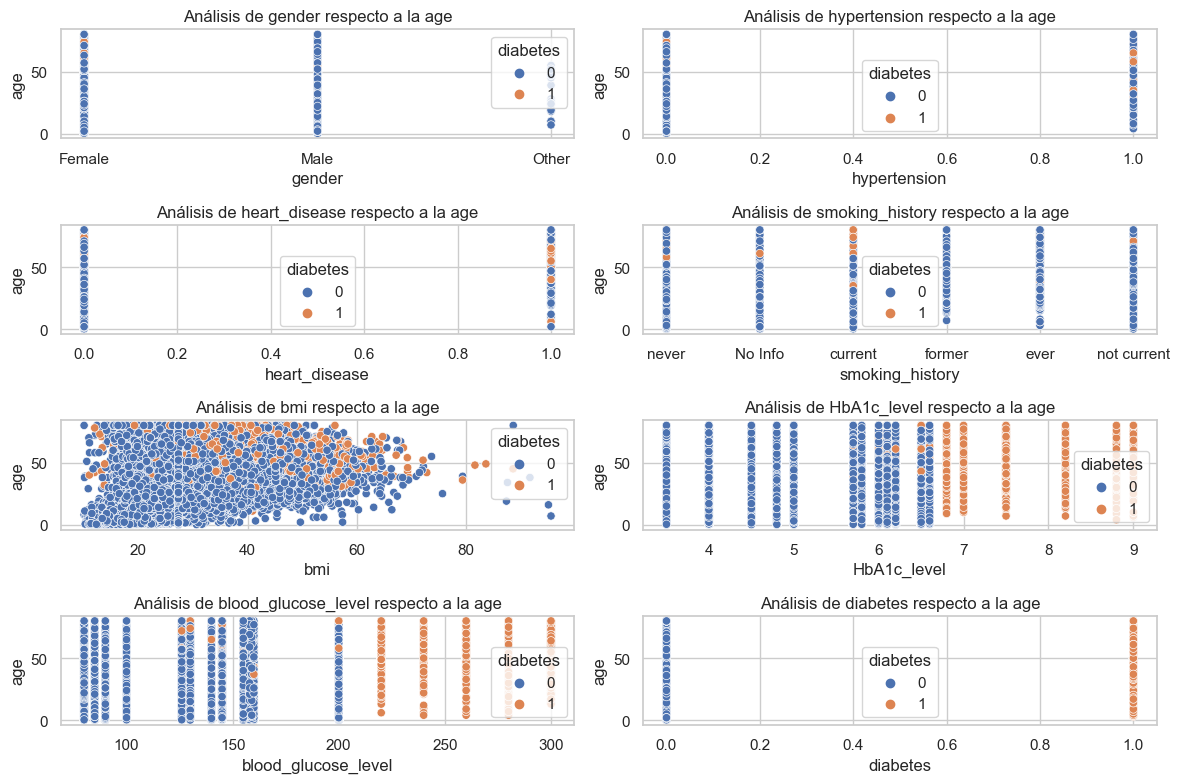

In [7]:
visu_column(caracteristica="age", df=df, dependencia="diabetes")

###### Visualización de los datos respecto a la hipertensión

Se puede observar que la hipertensión no va poco relacionada con tener o no tener diabetes. Tenemos una pequeña relación con el BMI y la edad.

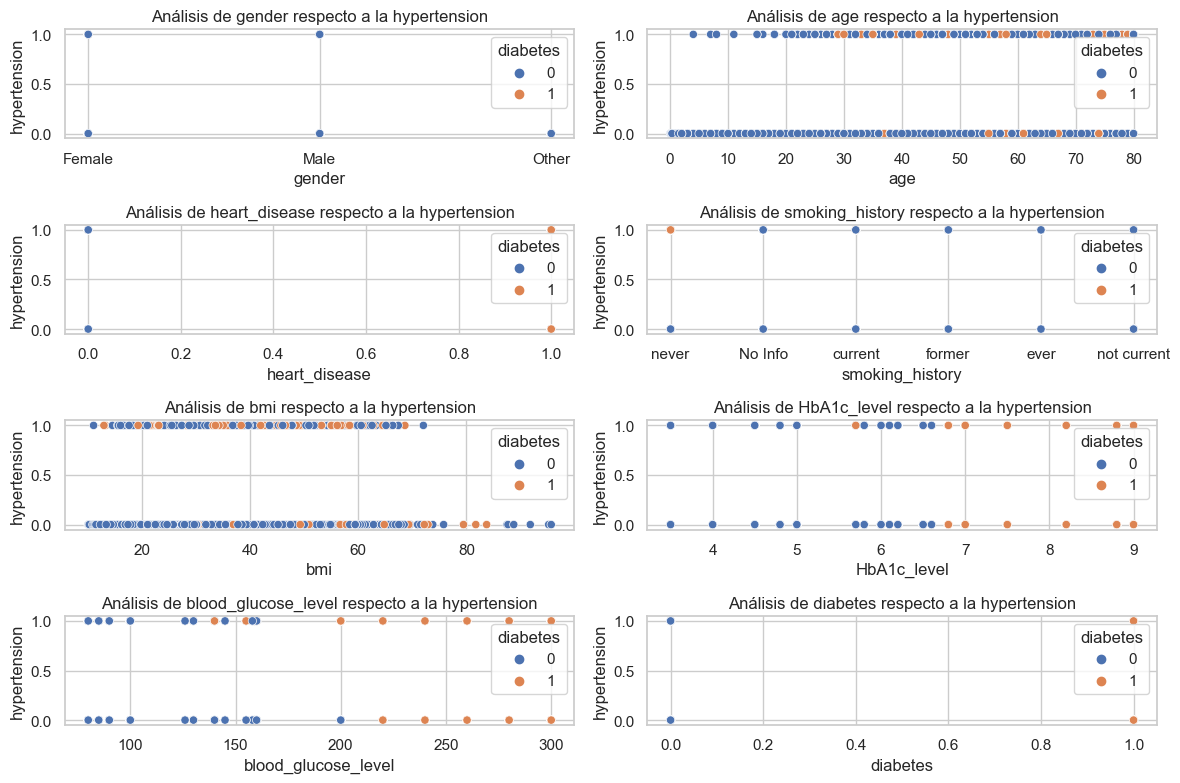

In [8]:
visu_column(caracteristica="hypertension",df=df,dependencia="diabetes")

###### Visualización de los datos respecto a la enfermedad de corazón

Podemos observar que tener alguna enfermedad del corazón junto con la edad, hipertensión, ser fumador y tener el BMI alto indica altas probabilidades de tener diabetes.

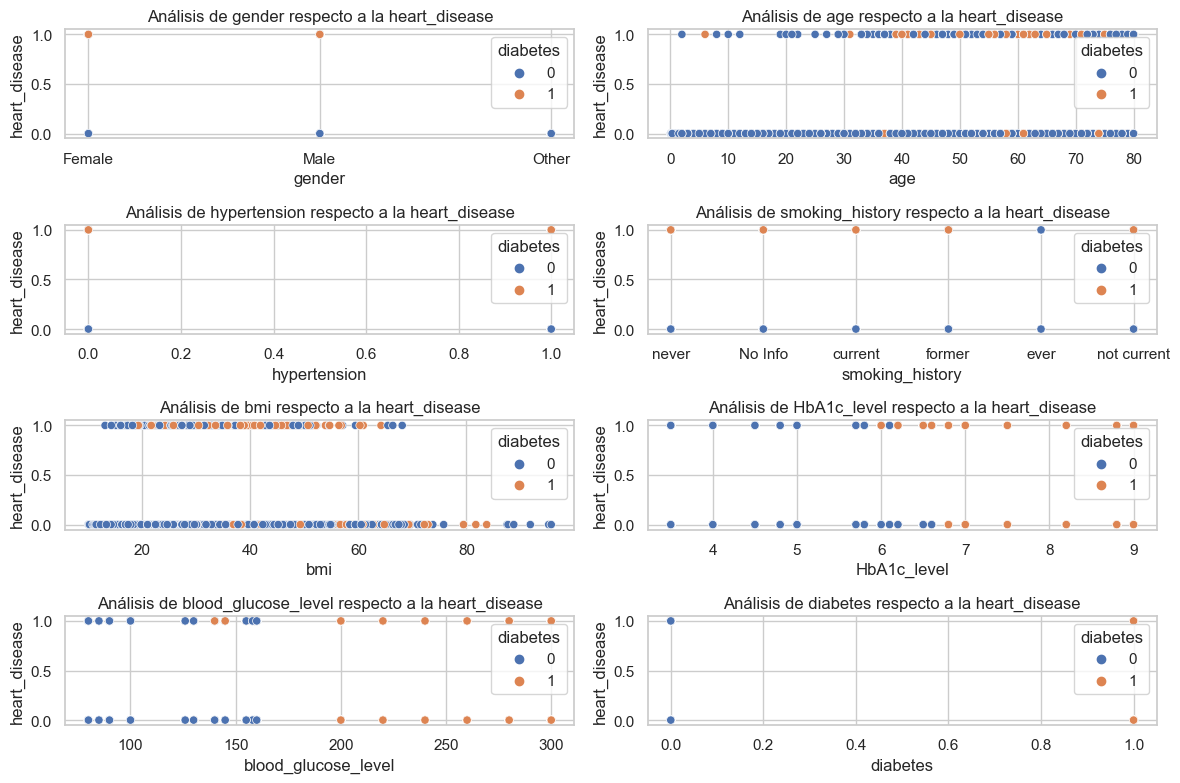

In [9]:
visu_column(caracteristica="heart_disease", df=df, dependencia="diabetes")

###### Visualización de los datos respecto al histórico de fumar

La relación de fumar o no con el resto de las características influye mayoritariamente con la edad, la glucosa en la sangre y el BMI de tener diabetes,

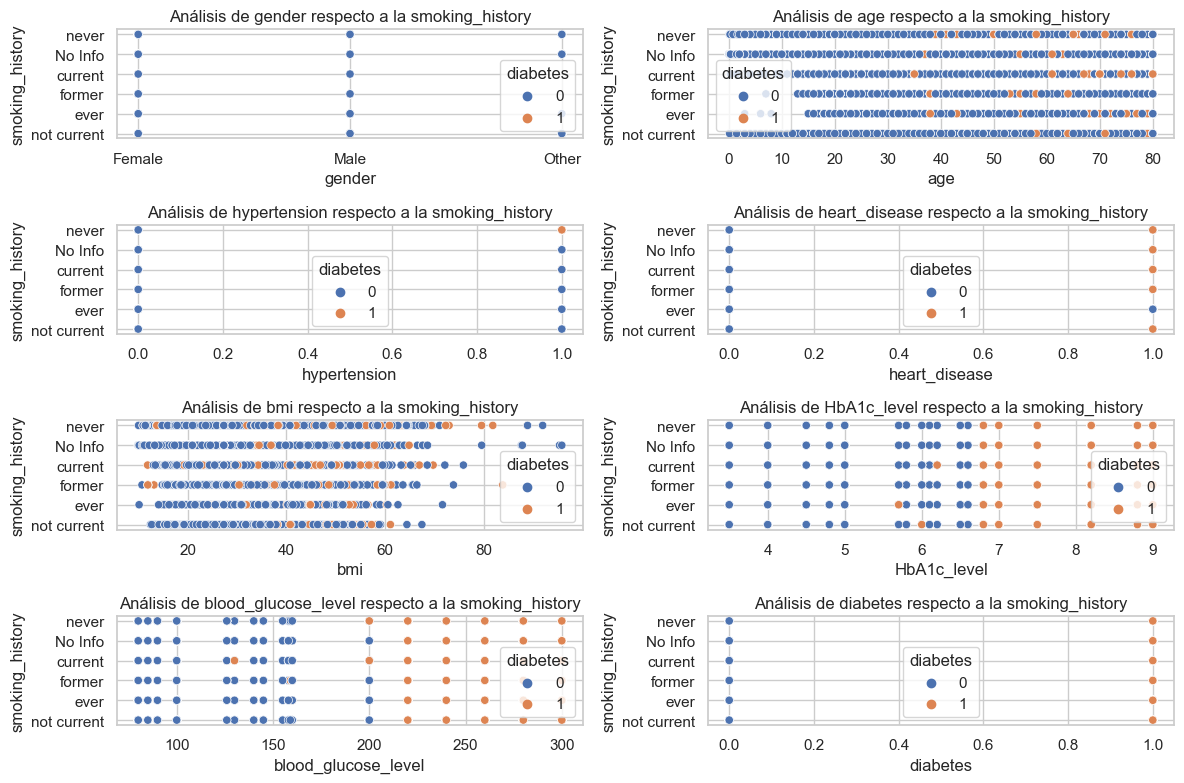

In [10]:
visu_column(caracteristica="smoking_history", df=df, dependencia="diabetes")

###### Visualización de los datos respecto al índice de masa corporal (BMI)

La relación con la diabetes con el BMI es alta porque la mayoría de las características junto con un índice alto se puede observar las probabilidades de tener diabetes.

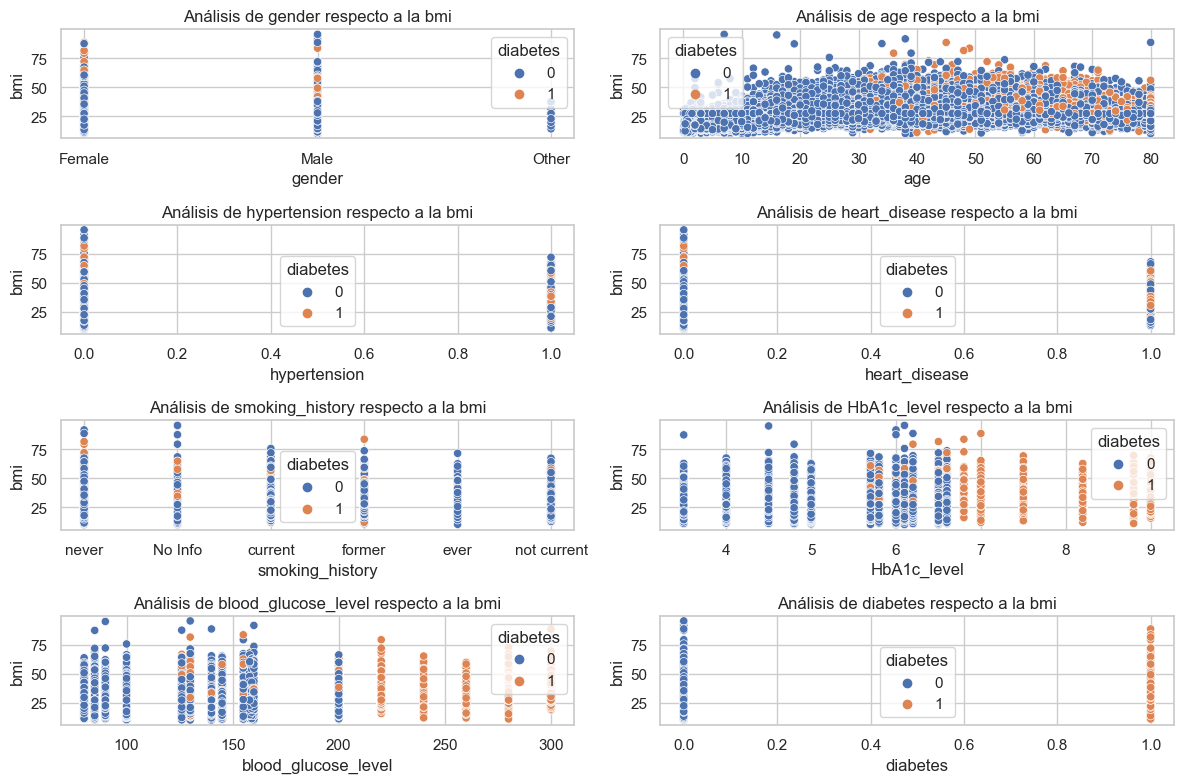

In [11]:
visu_column(caracteristica="bmi", df=df, dependencia="diabetes")

###### Visualización de los datos respecto a la hemoglobina HbA1c

La relación con la diabetes con la hemoglobina es absoluta, tener unos valores altos es un indicativo de tener diabetes como se puede observar.

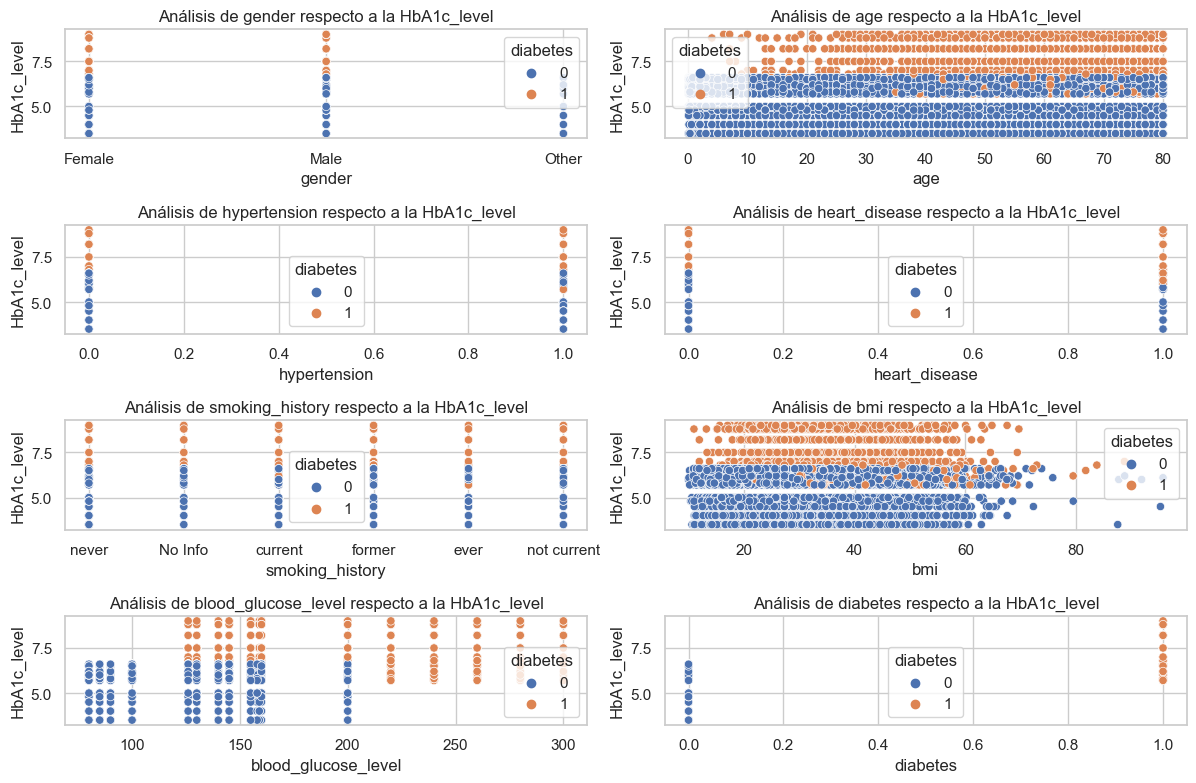

In [12]:
visu_column(caracteristica="HbA1c_level", df=df, dependencia="diabetes")

###### Visualización de los datos respecto al nivel de glucosa en sangre

Como en el caso anterior el nivel de glucosa alto es un perfecto indicativo de tener diabetes como se puede observar.

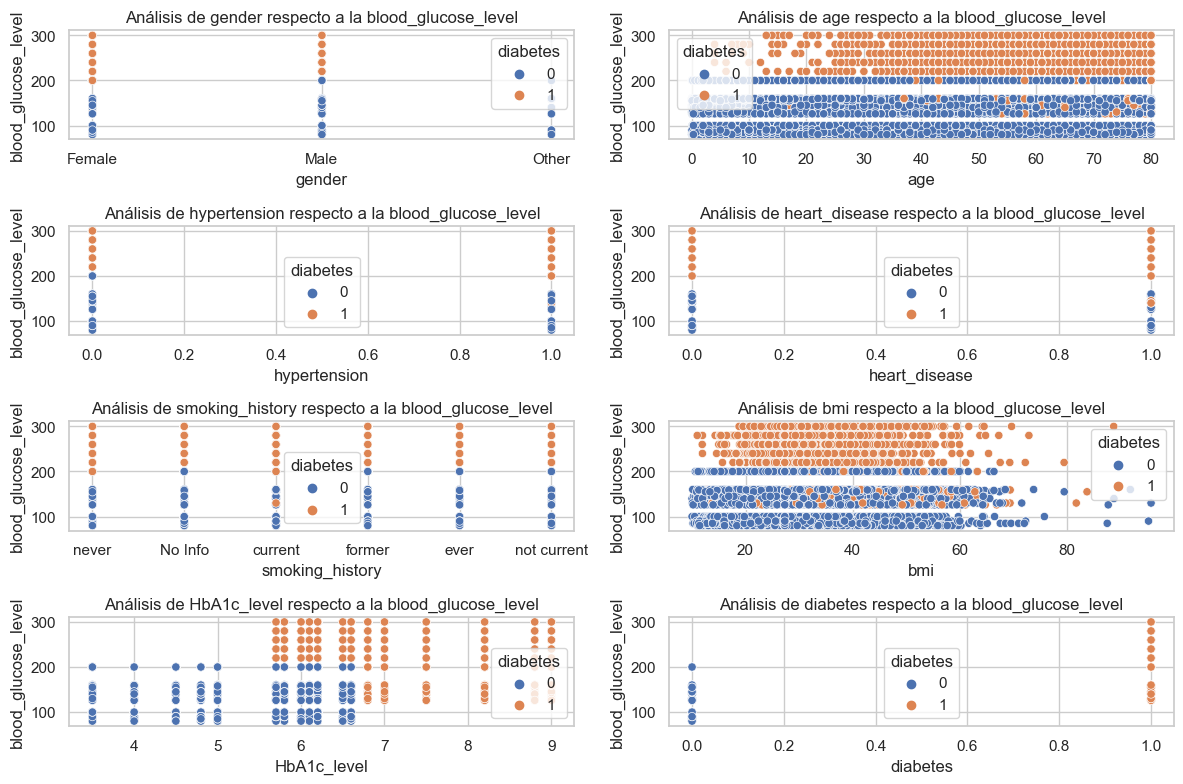

In [13]:
visu_column(caracteristica="blood_glucose_level",df=df,dependencia="diabetes")

### Correlación de los datos

Comprobación de la correlación de los datos entre sí. Verificar la correlación de los datos sirve para visualizar las dependecias de los datos entre sí y hacerte una idea de cuales características dependen de unas de otras.

Como hemos podido observar el dataset se compone tanto de datos numéricos como de datos categóricos. Para ello necesitaremos realizar un preprocesamiento de los datos para poder procesarlo posteriormente.

##### Preprocesamiento de los datos categóricos

El preprocesamiento de los datos consiste de dos técnicas diferentes, una en la columna de género que se trata de dos categorías he realizado el método LabelBinarizer de la librería Scikit Learn que consiste en sustituir cada clase por 0 y 1. Y la columna del histórico de fumar por uno muy parecido como es LabelEncoder el cual consiste en poner un número cada categoría.

Se puede observar que la columna de género unos pocos casos que se distingue Otros, al ser un porcentaje tan bajo de datos se opta por omitir esos casos.

In [14]:
# Preprocesamiento de los datos
# Binarizar la columna "gender"
labelbinarizer = LabelBinarizer() 
df["gender"] = labelbinarizer.fit_transform(df["gender"])
# Codificar la columna "smoking_history"
labelencoder = LabelEncoder()
df["smoking_history"] = labelencoder.fit_transform(df["smoking_history"])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,4,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,4,27.32,5.7,158,0
3,1,36.0,0,0,1,23.45,5.0,155,0
4,0,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,0,27.32,6.2,90,0
99996,1,2.0,0,0,0,17.37,6.5,100,0
99997,0,66.0,0,0,3,27.83,5.7,155,0
99998,1,24.0,0,0,4,35.42,4.0,100,0


##### Correlación de los datos

Demostración de la correlación de la características del dataset entre sí.

Podemos observar que las características "HbA1c_level" y "blood_glucose_level" son las más fuertes para nuestra característica dependiente que es la columna de diabetes. También podemos observar que la caracterítica de género el nivel de correlación es muy bajo.


In [15]:
# Correlación de todos los datos
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.030480,-0.014318,-0.077832,0.078141,0.023016,-0.020015,-0.017200,-0.037553
age,0.030480,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,-0.014318,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,-0.077832,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,0.078141,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,0.023016,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,-0.020015,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,-0.017200,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,-0.037553,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


### Conclusiones del análisis previo de los datos

Se puede sacar de este análisis previo que unos niveles altos de hemoglobina y y un nivel alto de glucosa en sangre son dos indicadores de tener diabetes, el resto de características aportan en menor nivel. Que seas hombre o mujer no influye demasiado a tener diabetes. Y tener una elevada edad junto las demás de las características ayuda mucho a padecer diabetes.


# Preprocesamiento de los datos


### Limpieza de los datos

El proceso de limpieza de datos es importante en el preprocesamiento de los datos. En este punto es donde transformaremos los datos para poder usarlos en nuestros modelos predictivos.

Nuestro dataset no hay que realizarle mucha limpieza, ya que no tiene datos nulos ni outliers. Solamente eliminaremos la columna de de género ya que hemos visto que no va a aportar nada a nuestro modelo.

In [16]:
# Eliminación de la columna "gender"
df.drop("gender", axis=1, inplace=True)
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,4,25.19,6.6,140,0
1,54.0,0,0,0,27.32,6.6,80,0
2,28.0,0,0,4,27.32,5.7,158,0
3,36.0,0,0,1,23.45,5.0,155,0
4,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,80.0,0,0,0,27.32,6.2,90,0
99996,2.0,0,0,0,17.37,6.5,100,0
99997,66.0,0,0,3,27.83,5.7,155,0
99998,24.0,0,0,4,35.42,4.0,100,0


### Escalado de los datos

El escalamiento de los datos es una parte tambíen de preprocesamiento ya que lo que hacemos es poner todas las variables en la misma magnitud. Por ejemplo en la columna de edad tenemos un 80 y en la columna de hipertensión es 0 y 1 sus valores. Así que tenemos que proceder a poner todas las características en la misma escala.

Para ello aplicamos un método de Scikit Learn llamado MinMaxScaler que funciona muy bien en estos casos, solamente procesaremos las características y no la columna dependiente.


In [17]:
#Escalar las características
scaler = MinMaxScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.000000,0.0,1.0,0.8,0.177171,0.563636,0.272727,0
1,0.674675,0.0,0.0,0.0,0.202031,0.563636,0.000000,0
2,0.349349,0.0,0.0,0.8,0.202031,0.400000,0.354545,0
3,0.449449,0.0,0.0,0.2,0.156863,0.272727,0.340909,0
4,0.949950,1.0,1.0,0.2,0.118231,0.236364,0.340909,0
...,...,...,...,...,...,...,...,...
99995,1.000000,0.0,0.0,0.0,0.202031,0.490909,0.045455,0
99996,0.024024,0.0,0.0,0.0,0.085901,0.545455,0.090909,0
99997,0.824825,0.0,0.0,0.6,0.207983,0.400000,0.340909,0
99998,0.299299,0.0,0.0,0.8,0.296569,0.090909,0.090909,0


### División de los datos de positivos y negativos en diabetes

Creación de dos datasets nuevos en los cuales se agrupan los casos de diabetes o no para su posterior uso

In [18]:
# Dataset no diabetes
df_nodiabetes = df[df["diabetes"]==0]
df_nodiabetes

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.000000,0.0,1.0,0.8,0.177171,0.563636,0.272727,0
1,0.674675,0.0,0.0,0.0,0.202031,0.563636,0.000000,0
2,0.349349,0.0,0.0,0.8,0.202031,0.400000,0.354545,0
3,0.449449,0.0,0.0,0.2,0.156863,0.272727,0.340909,0
4,0.949950,1.0,1.0,0.2,0.118231,0.236364,0.340909,0
...,...,...,...,...,...,...,...,...
99995,1.000000,0.0,0.0,0.0,0.202031,0.490909,0.045455,0
99996,0.024024,0.0,0.0,0.0,0.085901,0.545455,0.090909,0
99997,0.824825,0.0,0.0,0.6,0.207983,0.400000,0.340909,0
99998,0.299299,0.0,0.0,0.8,0.296569,0.090909,0.090909,0


In [19]:
# Dataset diabetes
df_diabetes = df[df["diabetes"]==1]
df_diabetes

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,0.549550,0.0,0.0,0.8,0.108543,0.545455,0.545455,1
26,0.837337,0.0,1.0,1.0,0.202031,0.545455,0.545455,1
38,0.624625,1.0,0.0,0.2,0.202031,0.400000,0.818182,1
40,0.912412,0.0,0.0,0.6,0.185574,1.000000,0.363636,1
53,0.662162,0.0,0.0,0.6,0.202031,0.636364,0.359091,1
...,...,...,...,...,...,...,...,...
99935,0.812312,1.0,1.0,0.8,0.274743,0.854545,0.272727,1
99938,0.687187,0.0,1.0,0.6,0.238212,0.490909,1.000000,1
99957,0.762262,0.0,0.0,0.0,0.285247,0.545455,0.909091,1
99962,0.724725,1.0,0.0,0.8,0.330299,0.636364,0.545455,1


# Modelos

### Modelos de clasificación

Los modelos de clasificación nos sirve para clasificar los distintos datos en diferentes categorías. 

En nuestro dataset la columna dependiente contiene dos tipos o dos clases que son 0 y 1, así que este tipo de modelo nos puede servir perfectamente.

### 1. LogisticRegression

##### Razones de selección del modelo

La regresión logística es un modelo estadístico que en su forma básica utiliza una función logística para modelar una variable dependiente binaria. 

La regresión logística es relativamente rápida y eficiente en términos de recursos computacionales, lo que la hace adecuada para conjuntos de datos grandes. Es menos propensa al sobreajuste en comparación con algunos modelos más complejos, especialmente si se utiliza la regularización, que es una técnica para prevenir el sobreajuste.

##### Modelo LogisticRegression


In [22]:
# Separación de las columnas
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
# División de los datos en subsets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2,
                                                   random_state=1983)
# Creación
model = LogisticRegression()
# Entrenamiento
model.fit(X_train, y_train)
# Predicción
y_pred = model.predict(X_test)


##### Métricas para la evaluación del modelo



In [24]:
# Precisión
acc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de clasificación: {round(acc*100,2)}%")

Precisión del modelo de clasificación: 96.02%


In [28]:
# Exhaustividad (Recall)
recall = recall_score(y_test, y_pred)
print(f"Recall: {round(recall*100,2)}%")

Recall: 61.42%


In [29]:
# F1
f1 = f1_score(y_test, y_pred)
print(f"Puntuación F1: {round(f1*100,2)}%")

Puntuación F1: 71.73%


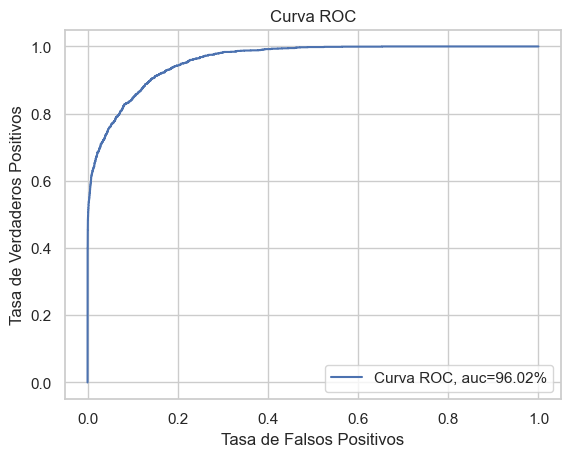

In [32]:
# Curva ROC
# Probabilidades de la clase positiva
y_pred_proba = model.predict_proba(X_test)[:,1]
# Hallamos la curva ROC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
# Represencación gráfica de la curva ROC
plt.plot(fpr,tpr,label=f"Curva ROC, auc={round(acc*100,2)}%")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

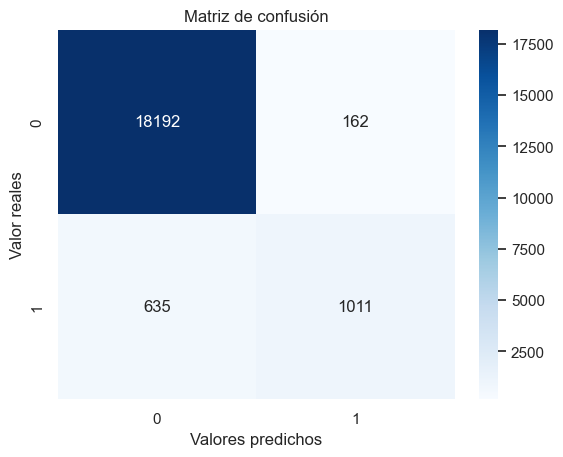

In [25]:
# Matriz de confusión
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Valores predichos")
plt.ylabel("Valor reales")
plt.title("Matriz de confusión")
plt.show()

##### Conclusiones del modelo

El modelo parece que ha dado unos buenos resultados en la predicción, un 96% de acierto es muy alto. Sin embargo, cuando hayas la exhaustividad baja al 61% y la puntuación F1 al 71%.

Realizamos la matriz de confusión, para ver realmente que ha acertado y fallado, podemos apreciar que el modelo no es muy bueno porque ha fallado de 1646 casos positivos en diabetes ha fallado 635, es decir ha fallado un 38% de las veces en los casos positivos.

Al tener un modelo tan descompensado de datos es normal que nos suceda esto para ello hay que añadirle al modelo otras técnicas de mejora para ver si nos devuelve unos mejores resultado.

##### Mejorando el modelo con división de datos

Usaremos el método StratifiedKFold para la división de datos para ver si mejorarmos nuestro modelo.

Precisión del entrenamiento: 96.02
Precisión del test: 96.09 
Recall: 5.41%
Puntuación F1: 6.6%


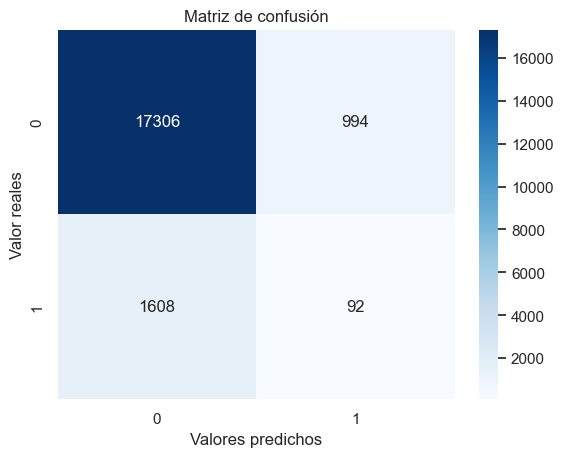

Precisión del entrenamiento: 96.02
Precisión del test: 96.04 
Recall: 5.29%
Puntuación F1: 6.46%


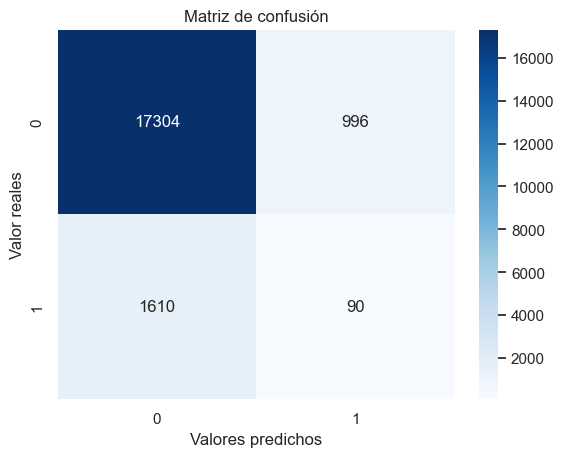

Precisión del entrenamiento: 96.04
Precisión del test: 95.99 
Recall: 4.47%
Puntuación F1: 5.46%


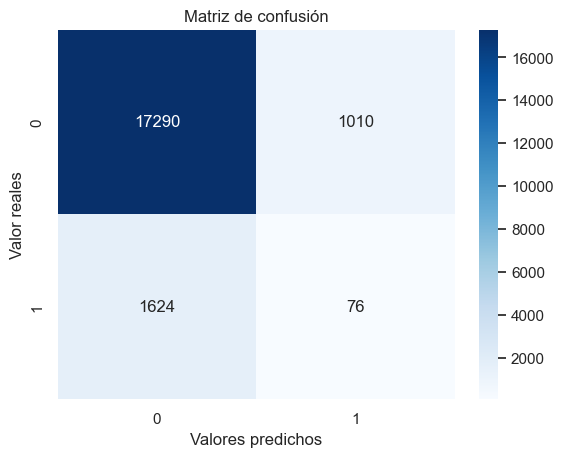

Precisión del entrenamiento: 96.03
Precisión del test: 95.99 
Recall: 6.41%
Puntuación F1: 7.82%


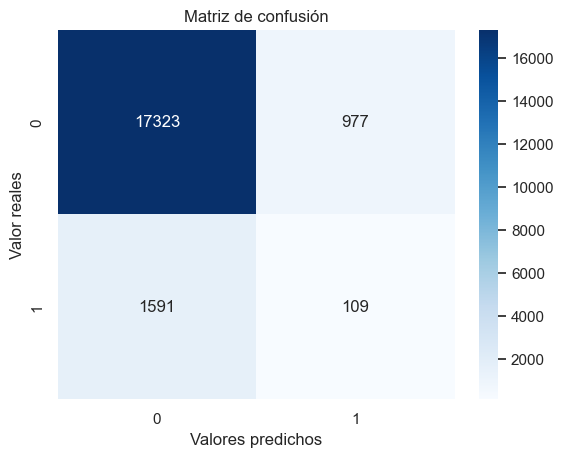

Precisión del entrenamiento: 96.02
Precisión del test: 96.02 
Recall: 5.76%
Puntuación F1: 7.04%


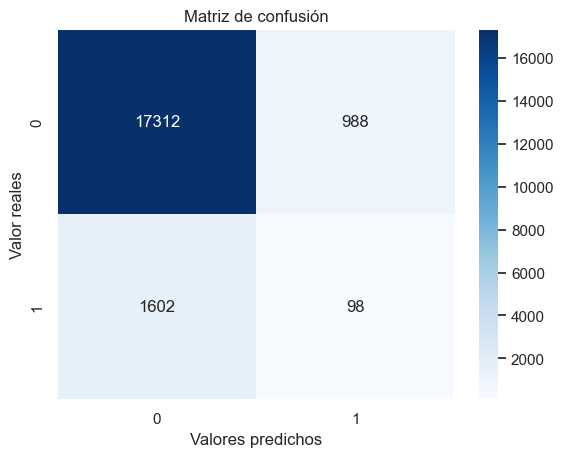

In [46]:
# Separación de las columnas
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
# División de los datos usando StratifiedKFold
# Inicializamos las listas para guardar los resultados
train_scores = []
test_scores = []
test_recall = []
test_f1 = []
# Creación del modelo a utilizar
model = LogisticRegression()
# Realizamos la validación cruzada con 5 splits
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X,y):
    # Dividimos los datos en los diferentes subsets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Realizamos el entrenamiento
    model.fit(X_train , y_train)
    
    # Realizamos la predicciones del modelo
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
        
    # Calculamos la precisión del modelo y los guardamos en una lista
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)
    print(f"Precisión del entrenamiento: {round(train_acc * 100, 2)}\nPrecisión del test: {round(test_acc * 100, 2)} ")
    
    # Calculamos la exhaustividad del modelo y lo guardamos en una lista
    recall = recall_score(y_test, y_pred)
    test_recall.append(recall)
    print(f"Recall: {round(recall*100,2)}%")
          
    # Calculamos la puntuación F1 y lo guardamos en una lista
    f1 = f1_score(y_test, y_pred)
    test_f1.append(f1)
    print(f"Puntuación F1: {round(f1*100,2)}%")
    
    # Creamos la matriz de confusión
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Valores predichos")
    plt.ylabel("Valor reales")
    plt.title("Matriz de confusión")
    plt.show()
    

##### Conclusiones de la mejora

Como podemos observar no hemos mejorado nada nuestro modelo, la precisión se mantiene pero las demás métricas dan resultados horribles y la matriz de confusión refleja unos resultados peores. Para ello vamos a realizar un algoritmo más complejo para ver si mejoramos.



### 2. RandomForestClassifier

##### Razones de selección del modelo

El algoritmo de Random Forest Classifier es un método de aprendizaje automático supervisado que se basa en el concepto de ensamble, es decir, combina múltiples modelos de decisión débiles para crear un modelo más robusto y preciso.

Razones de uso del algoritmo:
* Manejo de Overfitting: Aunque los árboles de decisión individuales son propensos al overfitting, los Random Forests en general son bastante robustos a este problema debido a la forma en que promedian las predicciones de muchos árboles diferentes.

* Manejo de Valores Faltantes: Random Forest tiene métodos incorporados para manejar los valores faltantes.

* Robustez ante Outliers: Los Random Forests son bastante robustos a los outliers o anomalías debido al uso de múltiples árboles.

* Paralelización: La formación de los árboles de decisión en un Random Forest puede ser paralelizada, lo que puede hacer que el algoritmo sea más eficiente en términos de tiempo de cómputo.

A pesar de todas sus ventajas este algoritmo es más lento en tiempo de cómputo que el algoritmo anterior y funciona peor cuando las características son lineales en comparación con la regresión logística.

##### Modelo RandomForestClassifier

In [34]:
# Separación de las columnas
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
# División de los datos en subsets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2,
                                                   random_state=1983)
# Creación
model = RandomForestClassifier(max_depth=5, random_state=1983)
# Entrenamiento
model.fit(X_train, y_train)
# Predicción
y_pred = model.predict(X_test)


##### Métricas para la evaluación del modelo



In [35]:
# Precisión
acc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de clasificación: {round(acc*100,2)}%")

Precisión del modelo de clasificación: 97.2%


In [36]:
# Exhaustividad (Recall)
recall = recall_score(y_test, y_pred)
print(f"Recall: {round(recall*100,2)}%")

Recall: 65.98%


In [37]:
# F1
f1 = f1_score(y_test, y_pred)
print(f"Puntuación F1: {round(f1*100,2)}%")

Puntuación F1: 79.5%


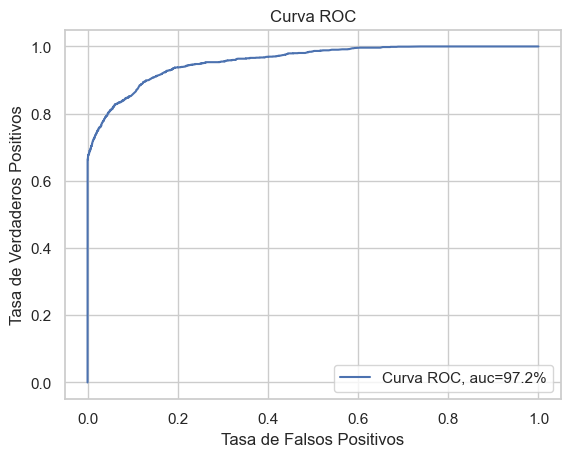

In [38]:
# Curva ROC
# Probabilidades de la clase positiva
y_pred_proba = model.predict_proba(X_test)[:,1]
# Hallamos la curva ROC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
# Represencación gráfica de la curva ROC
plt.plot(fpr,tpr,label=f"Curva ROC, auc={round(acc*100,2)}%")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

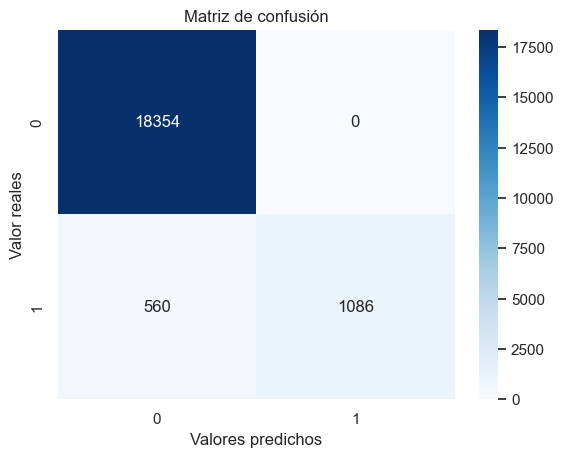

In [39]:
# Matriz de confusión
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Valores predichos")
plt.ylabel("Valor reales")
plt.title("Matriz de confusión")
plt.show()

##### Conclusiones del modelo

El modelo ha mejorado con este algoritmo, la precisión es de 97%, la exhaustividad al 65% y la puntuación F1 al 79%.

Como se puede apreciar en este modelo como en el anterior falla en la sensibilidad que tiene al identificar los casos positivos, para ello vamos a equilibrar los casos negativos con los positivos. Ya que se apreció en el análisis previo la descompensación que había entre los casos positivos y negativos.

##### Mejorando el modelo con la reducción de los datos

Precisión del modelo de clasificación: 98.38
Recall: 96.78%
Puntuación F1: 98.37%


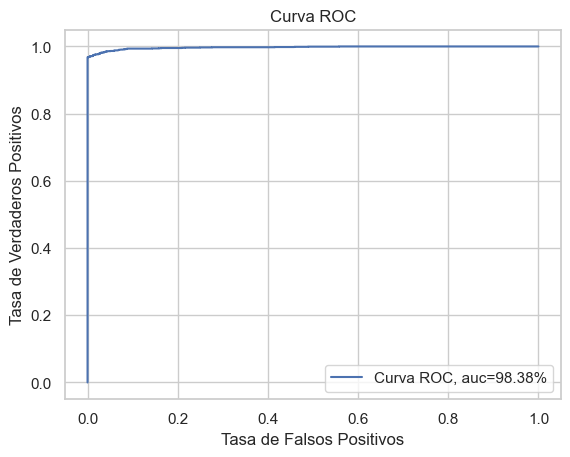

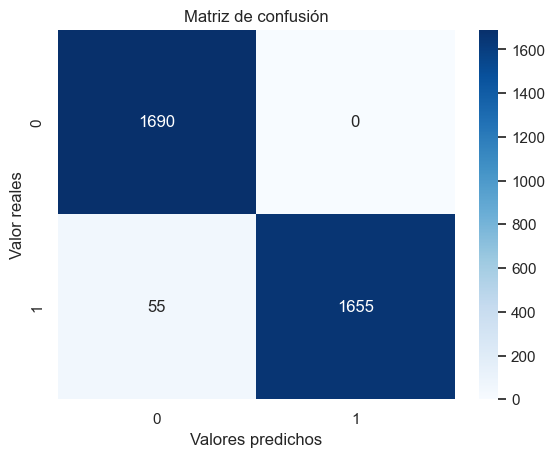

In [48]:
# Recogemos 8500 casos negativos en diabetes para equilibrar con los datos positivos
df1 = df_nodiabetes.iloc[:8500, :]
df_min = pd.concat([df1,df_diabetes], axis=0).reset_index()

# Separación de las columnas
X = df_min.iloc[:,:-1]
y = df_min.iloc[:, -1]
# División de los datos en subsets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2,
                                                   random_state=1983)
# Creación
model = RandomForestClassifier(max_depth=5, random_state=1983)
# Entrenamiento
model.fit(X_train, y_train)
# Predicción
y_pred = model.predict(X_test)
# Evaluación del modelo
acc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de clasificación: {round(acc*100,2)}")

# Calculamos la exhaustividad del modelo y lo guardamos en una lista
recall = recall_score(y_test, y_pred)
test_recall.append(recall)
print(f"Recall: {round(recall*100,2)}%")
          
# Calculamos la puntuación F1 y lo guardamos en una lista
f1 = f1_score(y_test, y_pred)
test_f1.append(f1)
print(f"Puntuación F1: {round(f1*100,2)}%")    

# Curva ROC
# Probabilidades de la clase positiva
y_pred_proba = model.predict_proba(X_test)[:,1]
# Hallamos la curva ROC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
# Represencación gráfica de la curva ROC
plt.plot(fpr,tpr,label=f"Curva ROC, auc={round(acc*100,2)}%")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()
    
# Matriz de confusión
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Valores predichos")
plt.ylabel("Valor reales")
plt.title("Matriz de confusión")
plt.show()

##### Conclusiones de la mejora del modelo

Como se puede apreciar la mejora del modelo ha sido sustancial al reducir los casos negativos hemos aumentado la exhaustividad hasta casi el 97% con lo cual la puntuación F1 ha mejorado también mucho.

Al representar la curva ROC y la matriz de confusión se puede apreciar las mejoras visualmente.

# Discusión

Los modelos usados han dado tanto uno como el otro siempre una precisión alta ya que la mayoría de los casos eran negativos y con unas características bastante definidas. Sin embargo, la sensibilidad o exhaustibidad del modelo hasta que no hemos equlibrado la cantidad de los casos negativos con los positivos no ha mejorado. Por lo tanto, una vez mejorado la sensibilidad hemos mejorado la puntuación F1.

Al realizar este proyecto hemos visto la importancia de los datos, al realizar un algoritmo simple como es LogisticRegression como un algoritmo más complejo como es RandomForestClassifier el modelo no ha mejorado mucho, pero una vez tratado los datos con un balanceo de los datos en sí es cuando hemos obtenido resultados más favorables.

Una futura mejora es ir recopilando más casos positivos e ir balanceando los todos los datos negativos que tenemos ya recopilados y es bastante problable aumentado los casos consigamos una predicción más alta. Ya que las características no son demasiadas y son bastantes determinantes.